<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **import required libraries**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import HashingVectorizer

# **Load your Dataset**

In [12]:
from google.colab import files
uploaded = files.upload()

Saving twitter_human_bots_dataset.csv to twitter_human_bots_dataset (1).csv


In [14]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Assuming your dataset is a CSV file
df = pd.read_csv('twitter_human_bots_dataset.csv')


Saving twitter_human_bots_dataset.csv to twitter_human_bots_dataset (3).csv


In [16]:
# Preview the data
df.head()

,id,account_type
0,787405734442958848,bot
1,796216118331310080,human
2,875949740503859204,human
3,756119643622735875,human
4,464781334,human


In [17]:
# Encode the 'account_type' column as 0 for 'bot' and 1 for 'human'
df['account_type'] = df['account_type'].apply(lambda x: 0 if x == 'bot' else 1)

# Normalize or transform the 'id' column to make it suitable for machine learning models
df['id'] = df['id'].astype(float)


In [18]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df[['id']]
y = df['account_type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6207264957264957
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.41      0.42      2487
           1       0.71      0.72      0.72      5001

    accuracy                           0.62      7488
   macro avg       0.57      0.57      0.57      7488
weighted avg       0.62      0.62      0.62      7488



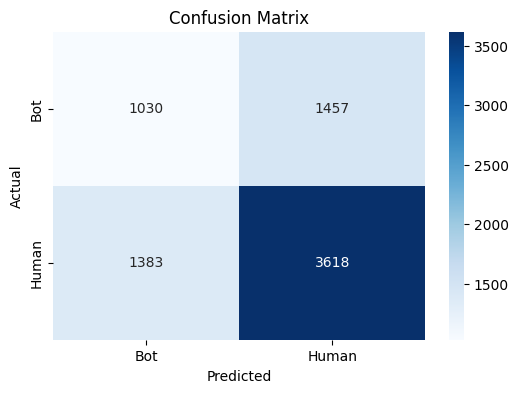

In [23]:
import joblib

# Save the model
joblib.dump(model, 'twitter_intrusion_detection_model.pkl')
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bot', 'Human'], yticklabels=['Bot', 'Human'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Load the model
model = joblib.load('twitter_intrusion_detection_model.pkl')


In [25]:
import joblib

# Save the model
joblib.dump(model, 'twitter_intrusion_detection_model.pkl')

# Load the model
model = joblib.load('twitter_intrusion_detection_model.pkl')


In [26]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00


In [28]:
import gradio as gr
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('twitter_intrusion_detection_model.pkl')

# Define a function that uses the model to predict the account type
def predict_account_type(account_id):
    # Convert input to DataFrame
    account_data = pd.DataFrame([[float(account_id)]], columns=['id'])

    # Make the prediction (model predicts either 0 for bot or 1 for human)
    prediction = model.predict(account_data)

    # Return the predicted label
    return "Bot" if prediction == 0 else "Human"

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_account_type,  # Function to call when input is submitted
    inputs=gr.Textbox(label="Twitter Account ID"),  # Input field for account ID
    outputs=gr.Label(label="Account Type"),  # Output field showing predicted label
    title="Twitter Intrusion Detection Model",  # Title of the interface
    description="Enter a Twitter account ID to predict whether it's a bot or a human."  # Short description
)



In [29]:
# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5e508dea85fc32874a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
